In [36]:
import pandas as pd
import numpy as np
from os import listdir
import re
from deep_translator import GoogleTranslator
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt

In [24]:
uk = pd.read_csv("results/uk_sample_sent.csv")
de = pd.read_csv("results/de_sample_sent.csv")
de_users = pd.read_csv("data/DE_politician_twitter_users.csv")[['followers_count', 'following_count', 'tweet_count', 'party', 'author_id']]
uk_users = pd.read_csv("data/UK_politician_twitter_users.csv")[['followers_count', 'following_count', 'tweet_count', 'party', 'author_id']]

In [25]:
uk_users.head()

,followers_count,following_count,tweet_count,party,author_id
0,4416240,459,5728,Conservative,3131144855
1,2464636,3080,16161,Independent,117777690
2,1227622,408,7879,Labour,2425571623
3,1009096,31,1825,Conservative,747807250819981312
4,777064,1640,7989,Labour,61781260


In [26]:
de = pd.merge(de, de_users, on='author_id', how='left')
uk = pd.merge(uk, uk_users, on='author_id', how='left')


### Moral Outrage

In [27]:
with open('brady_2017/Moral.txt', 'r') as infile:
    moral_outrage_uk = infile.read().splitlines()

moral_outrage_stem_uk = [w.strip() for w in moral_outrage_uk if w[-1] == '*']
moral_outrage_uk = [w.strip() for w in moral_outrage_uk if w[-1] != '*']

outrage_stem_pattern_uk = re.compile(r'\b(?:%s)\b' % '|'.join(moral_outrage_stem_uk), re.IGNORECASE)
outrage_pattern_uk = re.compile(r'\b(?:%s)\b' % '|'.join(moral_outrage_uk), re.IGNORECASE)


def count_outrage(text: str, pattern, stem_pattern):
    return len(re.findall(pattern, text)) + len(re.findall(stem_pattern, text))


uk['outrage_count'] = uk['text'].apply(lambda x: count_outrage(x, outrage_pattern_uk, outrage_stem_pattern_uk))


In [28]:


translator = GoogleTranslator(target='de')

moral_outrage_de = [translator.translate(w) for w in moral_outrage_uk]
moral_outrage_stem_de = [translator.translate(w) for w in moral_outrage_stem_uk]

with open('outrage_de', 'w') as outfile:
    outfile.write(','.join(moral_outrage_de))

with open('outrage_stem_de', 'w') as outfile:
    outfile.write(','.join(moral_outrage_stem_de))

outrage_stem_pattern_de = re.compile(r'\b(?:%s)\b' % '|'.join(moral_outrage_stem_de), re.IGNORECASE)
outrage_pattern_de = re.compile(r'\b(?:%s)\b' % '|'.join(moral_outrage_de), re.IGNORECASE)


de['outrage_count'] = de['text'].apply(lambda x: count_outrage(x, outrage_pattern_de, outrage_stem_pattern_de ))

In [29]:
de_session_dates = [datetime(2009, 10, 27),
    datetime(2013, 10, 22),
    datetime(2017, 10, 24),
    datetime(2021, 10, 26)]

uk_session_dates = [datetime(2015, 5, 8),
    datetime(2017, 6, 8),
    datetime(2019, 12, 16)]

In [30]:
de['created_at_clean'] = de['created_at'].str[:-6]
de['date']  = pd.to_datetime(de['created_at_clean'], format='%Y-%m-%d %H:%M:%S')
uk['created_at_clean'] = uk['created_at'].str[:-6]
uk['date']  = pd.to_datetime(uk['created_at_clean'], format='%Y-%m-%d %H:%M:%S')

In [31]:
pd.unique(uk['year'])

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [32]:
de['session'] = 0
de['session'][(de['date']>de_session_dates[0]) & (de['date']<de_session_dates[1])] = 1
de['session'][(de['date']>de_session_dates[1]) & (de['date']<de_session_dates[2])] = 2
de['session'][(de['date']>de_session_dates[2]) & (de['date']<de_session_dates[3])] = 3
de['session'][(de['date']>de_session_dates[3])]  = 3


/tmp/ipykernel_3789/1078625180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de['session'][(de['date']>de_session_dates[0]) & (de['date']<de_session_dates[1])] = 1
/tmp/ipykernel_3789/1078625180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de['session'][(de['date']>de_session_dates[1]) & (de['date']<de_session_dates[2])] = 2
/tmp/ipykernel_3789/1078625180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de['session'][(d

In [33]:
uk['session'] = 0
uk['session'][(uk['date']>uk_session_dates[0]) & (uk['date']<uk_session_dates[1])] = 1
uk['session'][(uk['date']>uk_session_dates[1]) & (uk['date']<uk_session_dates[2])] = 2
uk['session'][(uk['date']>uk_session_dates[2])] = 3

/tmp/ipykernel_3789/3464907528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk['session'][(uk['date']>uk_session_dates[0]) & (uk['date']<uk_session_dates[1])] = 1
/tmp/ipykernel_3789/3464907528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk['session'][(uk['date']>uk_session_dates[1]) & (uk['date']<uk_session_dates[2])] = 2
/tmp/ipykernel_3789/3464907528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk['session'][(u

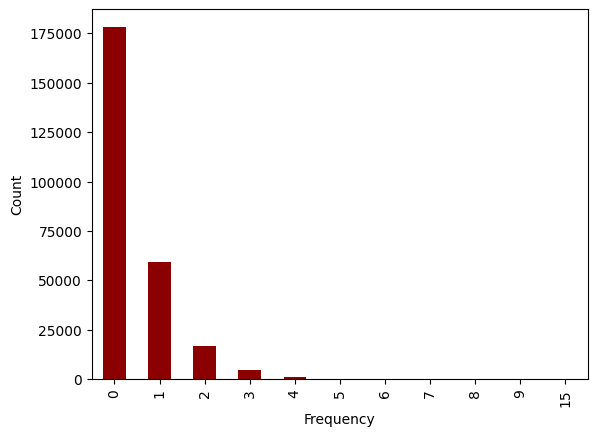

In [55]:
de['outrage_count'].value_counts().plot(kind='bar', color='darkred', xlabel='Frequency', ylabel='Count')
plt.savefig("plots/moral_outrage_de.png")


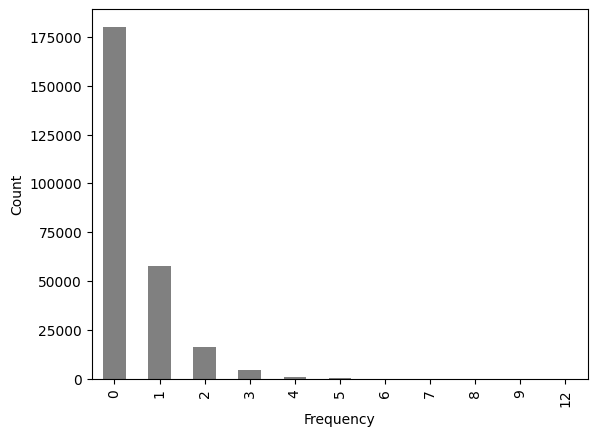

In [54]:
uk['outrage_count'].value_counts().plot(kind='bar', color='gray', xlabel='Frequency', ylabel='Count')
plt.savefig("plots/moral_outrage_uk.png")

In [67]:
def normalize(row):
    return (row -row.min()) / (row.max() - row.min())
 
de[['score', 'emotional_tone', 'outrage_count', 'like_count', 'retweet_count']] = de[['score', 'emotional_tone', 'outrage_count', 'like_count', 'retweet_count']].apply(lambda x: normalize(x), axis='index')
uk[['score', 'emotional_tone', 'outrage_count', 'like_count', 'retweet_count']] = uk[['score', 'emotional_tone', 'outrage_count', 'like_count', 'retweet_count']].apply(lambda x: normalize(x), axis='index')

In [16]:
uk = uk.dropna(subset='party')
de['year_rank'] = de['year'].rank(method='dense', ascending=False).astype(int)
uk['year_rank'] = uk['year'].rank(method='dense', ascending=False).astype(int)



In [17]:
de_dummies = pd.get_dummies(de['party']).astype(int)
de_dummies['CDU/CSU'] = de_dummies['CDU'] + de_dummies['CSU'] +  de_dummies['CDU/CSU']
de_dummies = de_dummies.drop(['CDU', 'CSU'], axis='columns')
de_comb = pd.concat([de, de_dummies], axis='columns')
de_partys = [ 'AFD', 'Alliance 90/The Greens', 'CDU/CSU', 'FDP', 'SPD', 'The Left Party']


In [18]:
uk_dummies = pd.get_dummies(uk['party']).astype(int)
uk_comb = pd.concat([uk, uk_dummies], axis='columns')
uk_partys = list(uk_dummies.columns)

In [19]:
def create_summary_df(model_results, index):
    shape = model_results.params.shape[0]
    coefs = np.round(model_results.params, 3).reshape(shape,1)
    std_error = np.round(model_results.bse, 3).reshape(shape,1)
    p_values = np.round(model_results.pvalues, 3).reshape(shape,1)
    conf_int_left = np.round(model_results.conf_int(), 3)[:,0].reshape(shape,1)
    conf_int_right = np.round(model_results.conf_int(), 3)[:,1].reshape(shape,1)

    res = np.concatenate([coefs, std_error, p_values, conf_int_left, conf_int_right], axis=1)
    cols =  ['Coefficient', 'Std. Error', 'P>|z|', 'CI_left', 'CI_right']

    df = pd.DataFrame(res, columns = cols, index = index)
    return df

In [22]:
pd.unique(de['year_rank'])

array([13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [21]:
x = np.array(de_comb['score']).reshape(260000,1)

vars = ['year_rank', 'emotional_tone', 'outrage_count', 'session', 'retweet_count', 'like_count']

vars.extend(de_partys)

y = np.array(de_comb[vars])

model_de_pol =sm.regression.mixed_linear_model.MixedLM(
    endog=x,
    exog=y,
    groups=de_comb['author_id']
)
result_de_pol = model_de_pol.fit()
result_de_pol.summary()

/home/mats/.local/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:            MixedLM Dependent Variable: y          
No. Observations: 260000  Method:             REML       
No. Groups:       550     Scale:              0.0263     
Min. group size:  1       Log-Likelihood:     103357.0687
Max. group size:  7172    Converged:          Yes        
Mean group size:  472.7                                  
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
x1             0.002    0.000   6.999 0.000  0.001  0.002
x2            -0.049    0.001 -36.949 0.000 -0.051 -0.046
x3             0.488    0.007  73.881 0.000  0.475  0.501
x4             0.001    0.001   0.806 0.420 -0.001  0.003
x5             0.381    0.055   6.939 0.000  0.273  0.489
x6             0.490    0.042  11.618 0.000  0.408  0.573
x7             0.220    0.006  34.209 0.000  0.207  0.233
x8             0.143    0.005  26.114 0.000  0.132  0.153
x9             0.136    0.006  24.589 0.000  0.125  0.147
x10            0.140    0.006  23.897 0.000  0.129  0.152
x11            0.139    0.005  25.802 0.000  0.129  0.150
x12            0.176    0.008  22.235 0.000  0.160  0.191
Group Var      0.001    0.001                            
=========================================================

"""

In [255]:
vars.append('politician')
result_de_pol_df = create_summary_df(result_de_pol, index=vars)
result_de_pol_df

,Coefficient,Std. Error,P>|z|,CI_left,CI_right
year_rank,0.002,0.000,0.00,0.001,0.002
emotional_tone,-0.049,0.001,0.00,-0.051,-0.046
outrage_count,0.488,0.007,0.00,0.475,0.501
session,0.001,0.001,0.42,-0.001,0.003
retweet_count,0.381,0.055,0.00,0.273,0.489
like_count,0.490,0.042,0.00,0.408,0.573
AFD,0.220,0.006,0.00,0.207,0.233
Alliance 90/The Greens,0.143,0.005,0.00,0.132,0.153
CDU/CSU,0.136,0.006,0.00,0.125,0.147
FDP,0.140,0.006,0.00,0.129,0.152


In [256]:
x = np.array(de['score']).reshape(260000,1)

vars = ['year_rank', 'emotional_tone', 'outrage_count', 'session', 'retweet_count', 'like_count']

y = np.array(de[['year_rank', 'emotional_tone', 'outrage_count', 'session', 'retweet_count', 'like_count']])

model_de_party =sm.regression.mixed_linear_model.MixedLM(
    endog=x,
    exog=y,
    groups=de['party_int']
)
result_de_party = model_de_party.fit()
result_de_party.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: y         
No. Observations: 260000  Method:             REML      
No. Groups:       9       Scale:              0.0273    
Min. group size:  72      Log-Likelihood:     99059.8787
Max. group size:  80254   Converged:          Yes       
Mean group size:  28888.9                               
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
x1            0.001    0.000   5.292 0.000  0.001  0.002
x2           -0.042    0.001 -32.749 0.000 -0.045 -0.040
x3            0.517    0.007  77.578 0.000  0.504  0.531
x4            0.002    0.001   2.312 0.021  0.000  0.004
x5            0.401    0.054   7.407 0.000  0.295  0.507
x6            0.541    0.041  13.160 0.000  0.461  0.622
Group Var     0.027    0.088                            
========================================================

"""

In [257]:
vars.append('party')
result_de_party_df = create_summary_df(result_de_party, vars)
result_de_party_df

,Coefficient,Std. Error,P>|z|,CI_left,CI_right
year_rank,0.001,0.000,0.000,0.001,0.002
emotional_tone,-0.042,0.001,0.000,-0.045,-0.040
outrage_count,0.517,0.007,0.000,0.504,0.531
session,0.002,0.001,0.021,0.000,0.004
retweet_count,0.401,0.054,0.000,0.295,0.507
like_count,0.541,0.041,0.000,0.461,0.622
party,1.000,0.535,0.062,-0.049,2.049


In [259]:

x = np.array(uk_comb['score']).reshape(uk.shape[0],1)



vars = ['year_rank', 'emotional_tone', 'outrage_count', 'session', 'retweet_count', 'like_count']

vars.extend(uk_partys)

y = np.array(uk_comb[vars])

model_uk_pol =sm.regression.mixed_linear_model.MixedLM(
    endog=x,
    exog=y,
    groups=uk['author_id']
)
result_uk_pol = model_uk_pol.fit()
result_uk_pol.summary()

/home/mats/.local/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:            MixedLM Dependent Variable: y          
No. Observations: 259757  Method:             REML       
No. Groups:       707     Scale:              0.0262     
Min. group size:  1       Log-Likelihood:     103652.9291
Max. group size:  4727    Converged:          Yes        
Mean group size:  367.4                                  
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
x1             0.001    0.000   4.908 0.000  0.001  0.002
x2            -0.028    0.001 -21.910 0.000 -0.030 -0.025
x3             0.368    0.005  72.056 0.000  0.358  0.378
x4             0.001    0.001   1.560 0.119 -0.000  0.003
x5             0.700    0.114   6.146 0.000  0.477  0.923
x6             0.329    0.091   3.605 0.000  0.150  0.508
x7             0.149    0.031   4.782 0.000  0.088  0.210
x8             0.103    0.004  27.053 0.000  0.096  0.111
x9             0.138    0.012  11.438 0.000  0.114  0.161
x10            0.118    0.030   3.956 0.000  0.059  0.176
x11            0.152    0.015  10.413 0.000  0.123  0.180
x12            0.129    0.004  32.700 0.000  0.122  0.137
x13            0.130    0.011  12.026 0.000  0.108  0.151
x14            0.135    0.009  15.636 0.000  0.118  0.152
x15            0.112    0.018   6.124 0.000  0.076  0.148
x16            0.129    0.006  23.056 0.000  0.118  0.140
x17            0.124    0.012  10.220 0.000  0.100  0.148
x18            0.147    0.022   6.794 0.000  0.105  0.189
x19            0.075    0.032   2.358 0.018  0.013  0.138
Group Var      0.001    0.000                            
=========================================================

"""

In [260]:
vars.append('politician')
result_uk_pol_df = create_summary_df(result_uk_pol, vars)
result_uk_pol_df

,Coefficient,Std. Error,P>|z|,CI_left,CI_right
year_rank,0.001,0.000,0.000,0.001,0.002
emotional_tone,-0.028,0.001,0.000,-0.030,-0.025
outrage_count,0.368,0.005,0.000,0.358,0.378
session,0.001,0.001,0.119,-0.000,0.003
retweet_count,0.700,0.114,0.000,0.477,0.923
like_count,0.329,0.091,0.000,0.150,0.508
Alliance,0.149,0.031,0.000,0.088,0.210
Conservative,0.103,0.004,0.000,0.096,0.111
Democratic Unionist Party,0.138,0.012,0.000,0.114,0.161
Green Party,0.118,0.030,0.000,0.059,0.176


In [265]:

x = np.array(uk['score']).reshape(uk.shape[0],1)

vars = ['year_rank', 'emotional_tone', 'outrage_count', 'session', 'retweet_count', 'like_count']
y = np.array(uk[vars])

model_uk_party =sm.regression.mixed_linear_model.MixedLM(
    endog=x,
    exog=y,
    groups=uk['party_int']
)
result_uk_party = model_uk_party.fit()
result_uk_party.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:            MixedLM Dependent Variable: y          
No. Observations: 259757  Method:             REML       
No. Groups:       13      Scale:              0.0271     
Min. group size:  172     Log-Likelihood:     100157.6966
Max. group size:  125381  Converged:          Yes        
Mean group size:  19981.3                                
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
x1             0.002    0.000   6.380 0.000  0.001  0.002
x2            -0.029    0.001 -22.864 0.000 -0.032 -0.027
x3             0.374    0.005  72.598 0.000  0.364  0.384
x4             0.002    0.001   1.902 0.057 -0.000  0.003
x5             0.472    0.113   4.176 0.000  0.250  0.693
x6             0.537    0.091   5.938 0.000  0.360  0.715
Group Var      0.017    0.041                            
=========================================================

"""

In [266]:
vars.append('party')
result_uk_party_df = create_summary_df(result_uk_party, vars)
result_uk_party_df

,Coefficient,Std. Error,P>|z|,CI_left,CI_right
year_rank,0.002,0.000,0.000,0.001,0.002
emotional_tone,-0.029,0.001,0.000,-0.032,-0.027
outrage_count,0.374,0.005,0.000,0.364,0.384
session,0.002,0.001,0.057,-0.000,0.003
retweet_count,0.472,0.113,0.000,0.250,0.693
like_count,0.537,0.091,0.000,0.360,0.715
party,0.620,0.251,0.013,0.129,1.112


In [268]:
result_de_pol_df.to_csv('results/result_de_pol.csv')
result_de_party_df.to_csv('results/result_de_party.csv')
result_uk_pol_df.to_csv('results/result_uk_pol.csv')
result_uk_party_df.to_csv('results/result_uk_party.csv')


### Plots

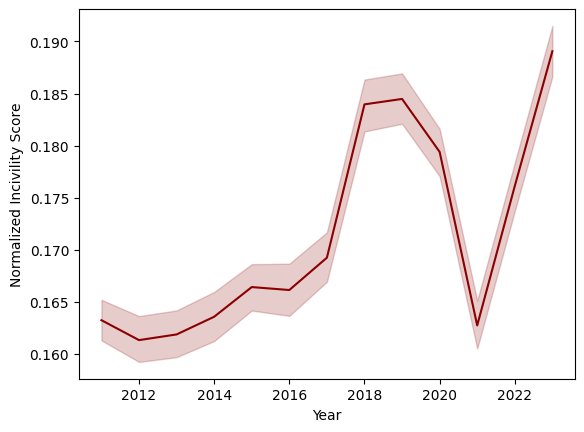

In [68]:
sns.lineplot(data=de, x='year', y='score', color='darkred').set(xlabel='Year', ylabel='Normalized Incivility Score')
plt.savefig('plots/incivility_time_ger.png')

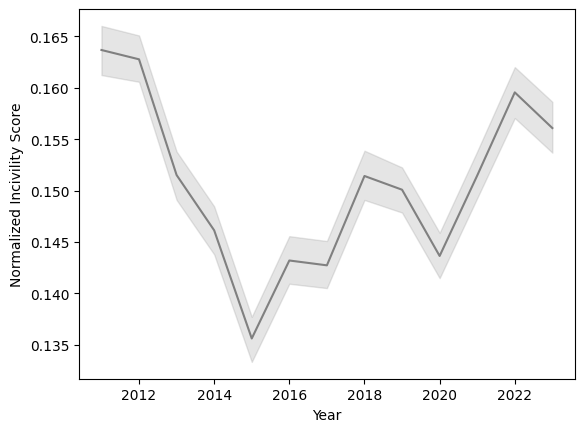

In [69]:
sns.lineplot(data=uk, x='year', y='score', color='gray').set(xlabel='Year', ylabel='Normalized Incivility Score')
plt.savefig('plots/incivility_time_uk.png')

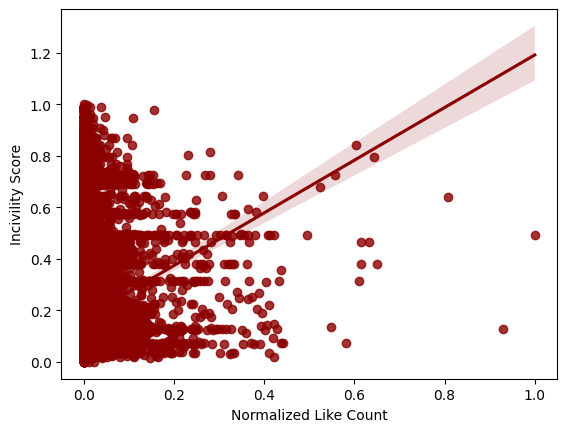

In [74]:
sns.regplot(x='like_count', y='score', data=de, color='darkred').set(xlabel='Normalized Like Count', ylabel='Incivility Score')
plt.savefig('plots/reg_likes_de.png')

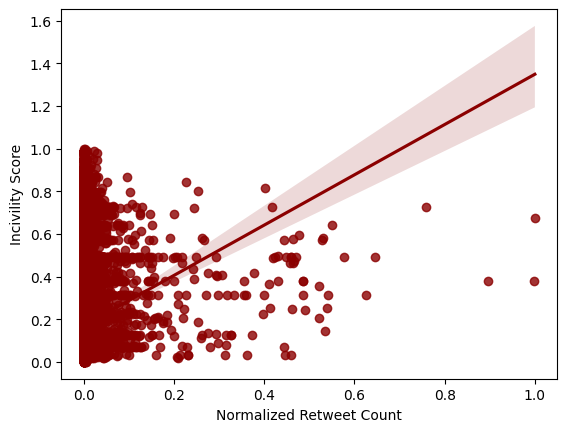

In [75]:
sns.regplot(x='retweet_count', y='score', data=de, color='darkred').set(xlabel='Normalized Retweet Count', ylabel='Incivility Score')
plt.savefig('plots/reg_retweets_de.png')

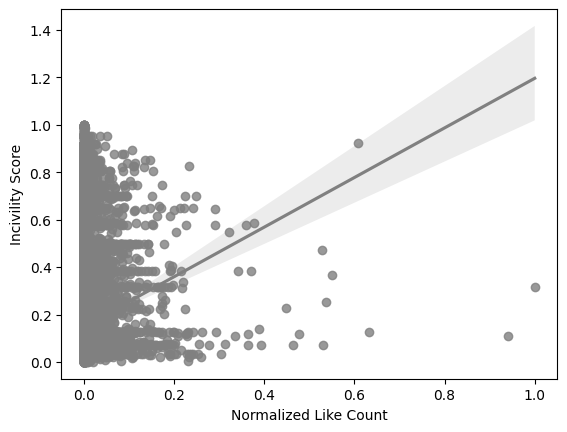

In [76]:
sns.regplot(x='like_count', y='score', data=uk, color='gray').set(xlabel='Normalized Like Count', ylabel='Incivility Score')
plt.savefig('plots/reg_likes_uk.png')

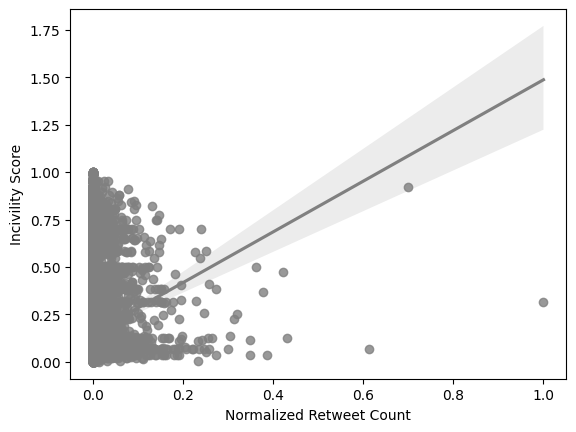

In [78]:
sns.regplot(x='retweet_count', y='score', data=uk, color='gray').set(xlabel='Normalized Retweet Count', ylabel='Incivility Score')
plt.savefig('plots/reg_retweet_uk.png')